# Wine clasification

This notebook looks at wine classification here we will predict the quality of the wine using the features 
using supervised learning, the performance should be measured by using accuracy score

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [41]:
df = pd.read_csv('winequalityN.csv')
print(df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

Since Type is a word we transform it into 1 and 0


In [42]:
df.replace({'white': 1, 'red': 0}, inplace=True)

C:\Users\Jesper Kristensen\AppData\Local\Temp\ipykernel_38004\2658418495.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'white': 1, 'red': 0}, inplace=True)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


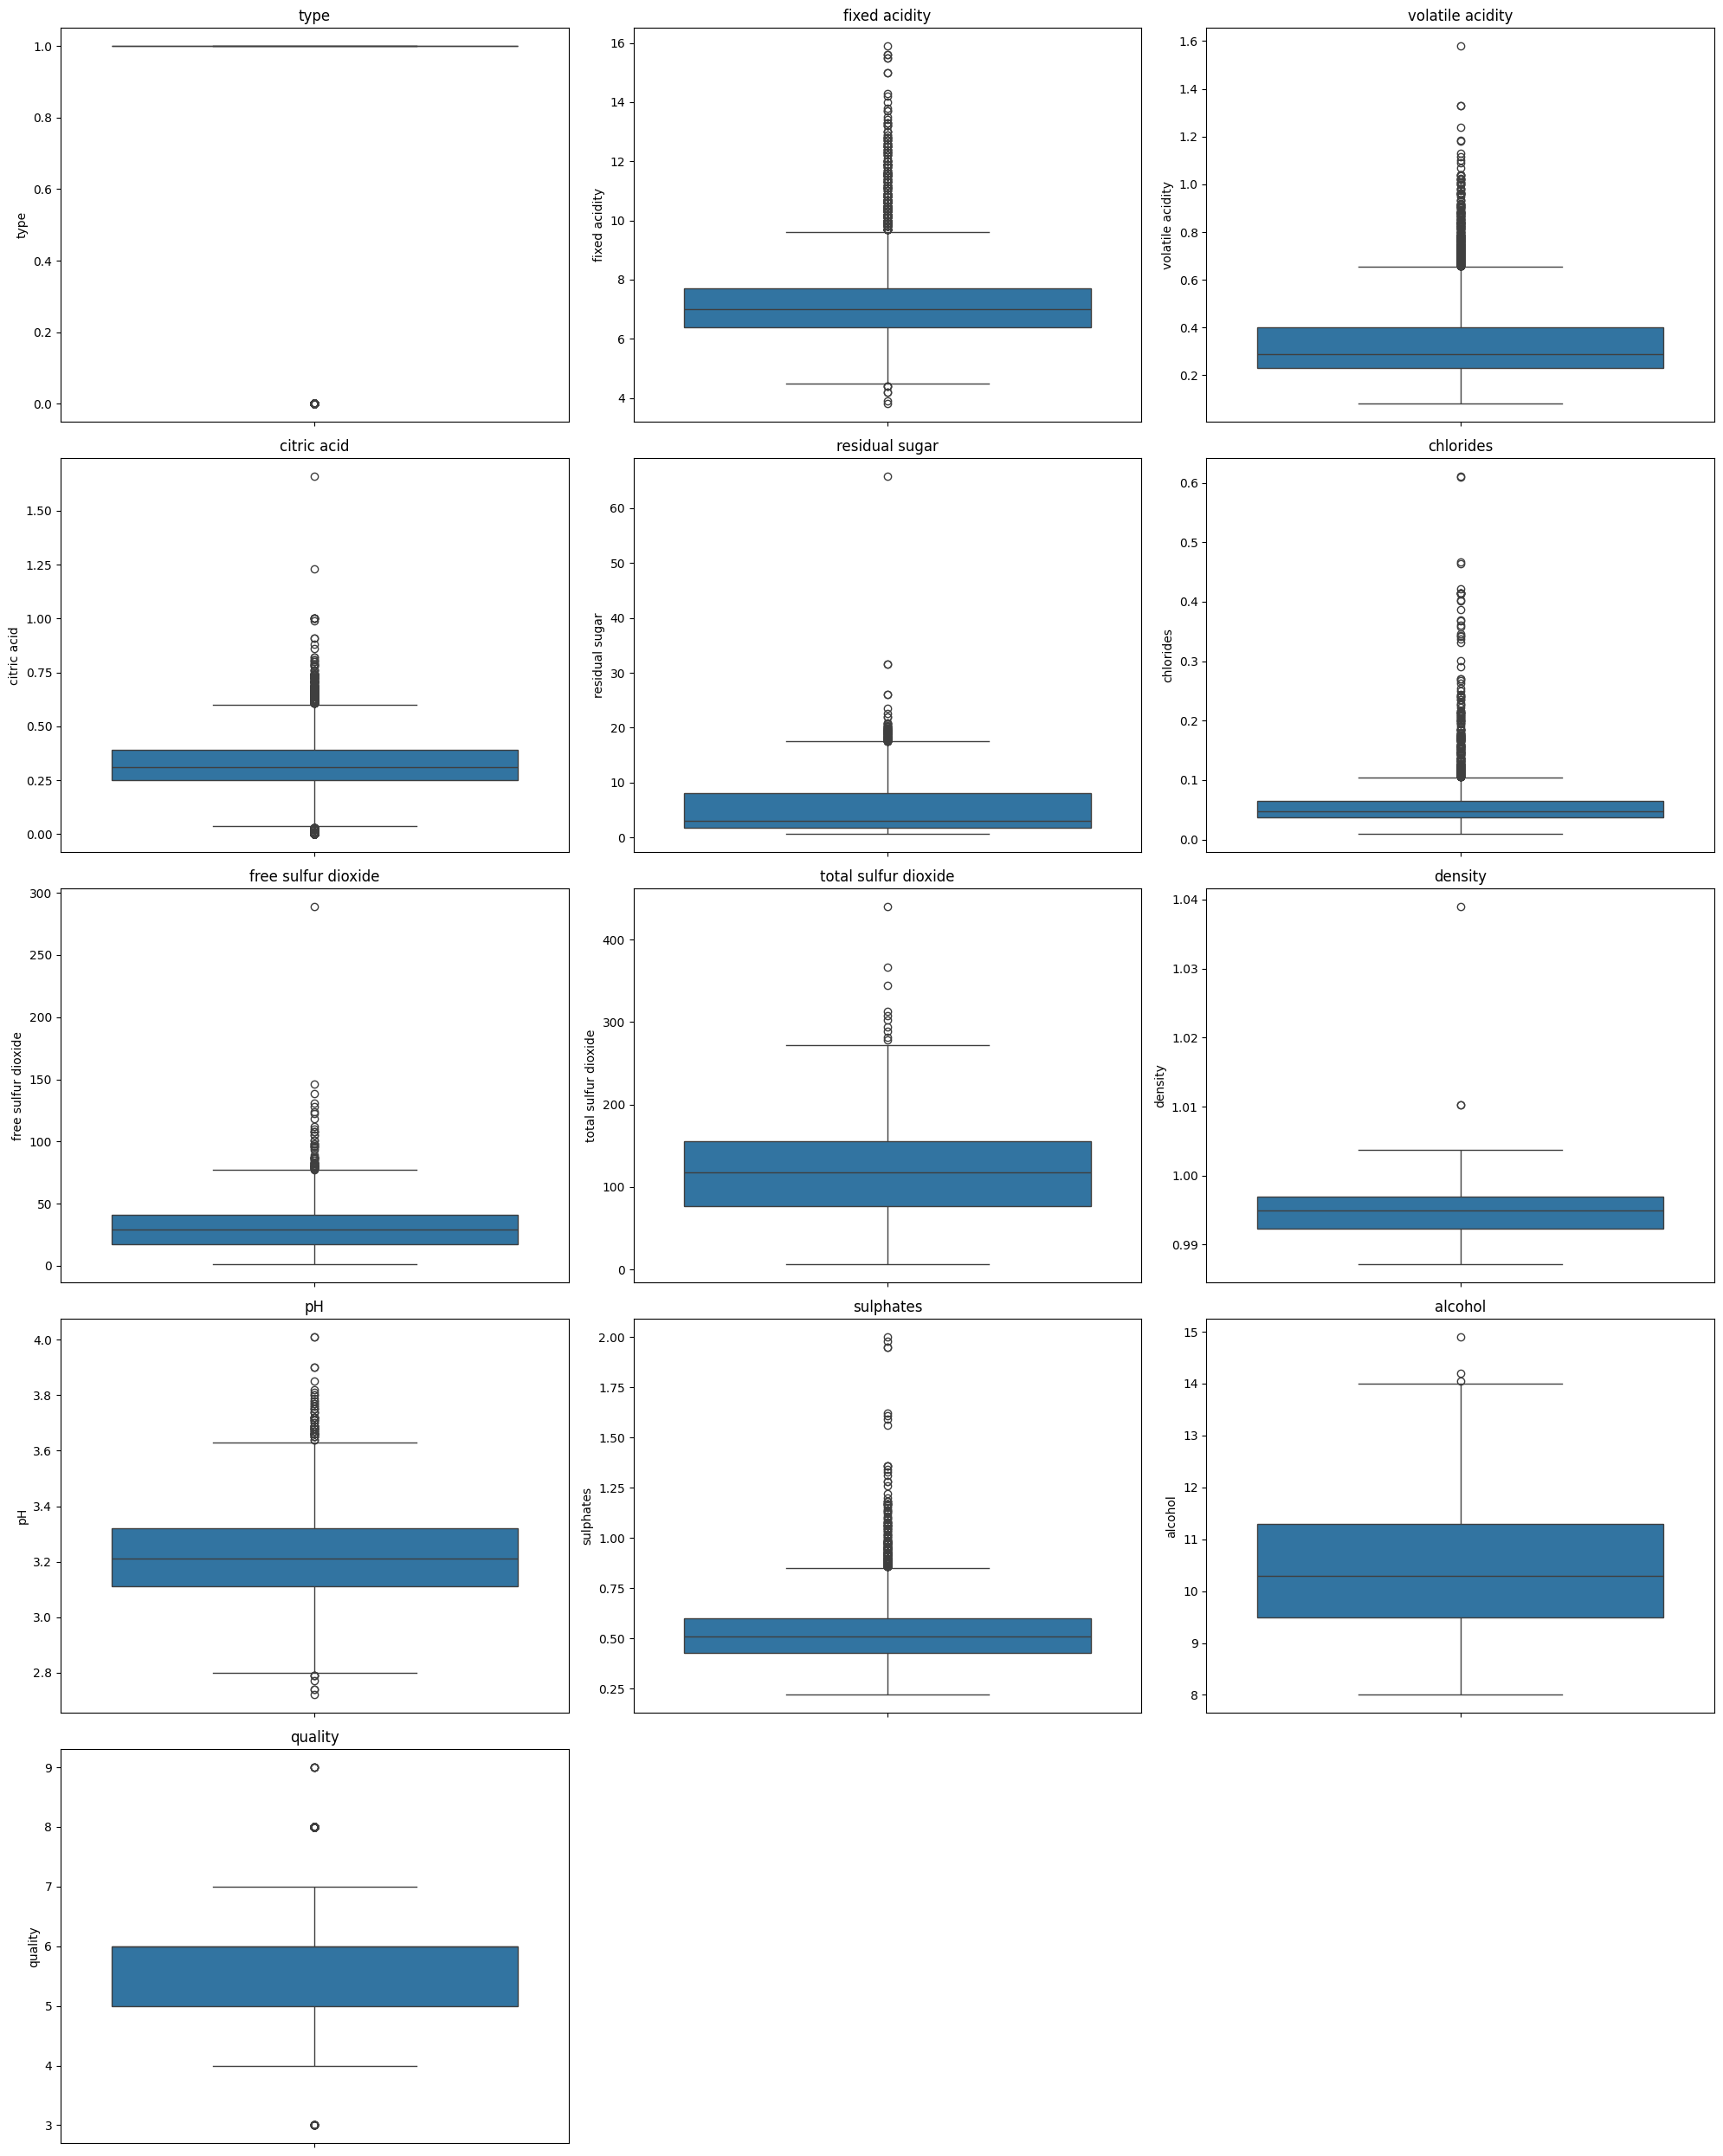

In [45]:
# Number of features to plot
num_features = len(df.columns)

# Number of rows and columns for the grid
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sb.boxplot(y=df[column])
    plt.title(column)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

IQR: Q3 – Q1 = IQR

Lower Boundary:  Q1 – 1.5*IQR
Higher boundary: Q3 + 1.5*IQR  

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
type,6497.0,0.753886,0.430779,0.00000,1.00000,1.00000,1.00000,1.00000
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000


Checking each feature for null values


In [46]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Impute missing values adding mean value when null


In [47]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df.isnull().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [48]:
quality_counts = df['quality'].value_counts().sort_index()
 
quality_percentages = (quality_counts / len(df)) * 100
 
quality_df = pd.DataFrame({'Count': quality_counts, 'Percentage': quality_percentages})
print(quality_df)

         Count  Percentage
quality                   
3.0         30    0.461752
4.0        216    3.324611
5.0       2138   32.907496
6.0       2836   43.650916
7.0       1079   16.607665
8.0        193    2.970602
9.0          5    0.076959


Plotting histograms to look for outliers, since lack of domain knowledge we can only assume a high jump would be a outlier value

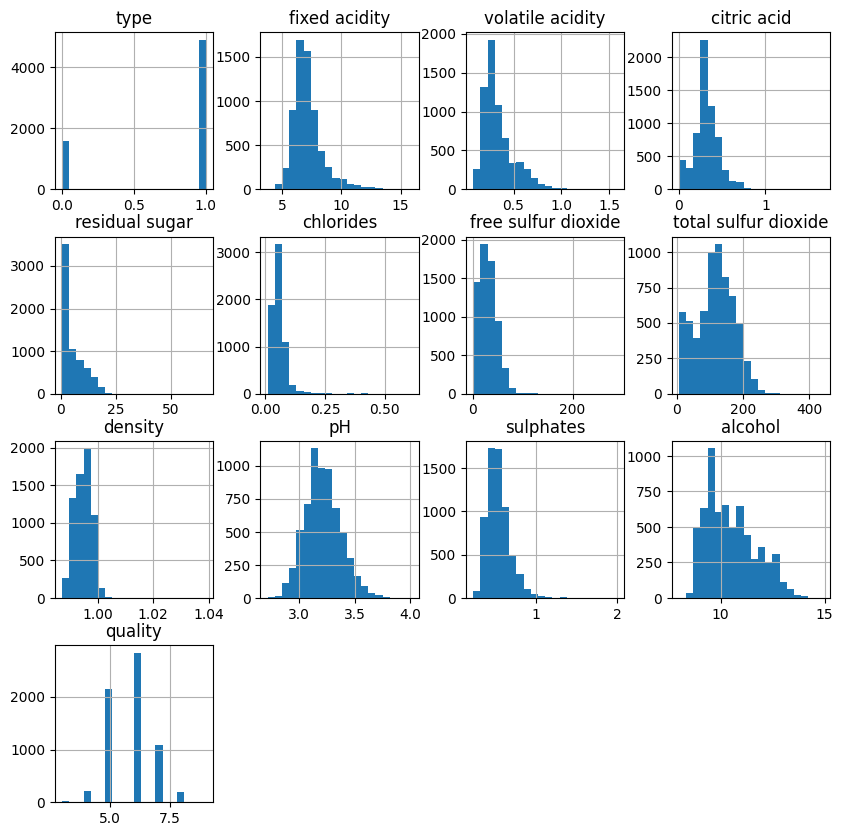

In [49]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

Looking if Alcohol percentage is equivalant with quality

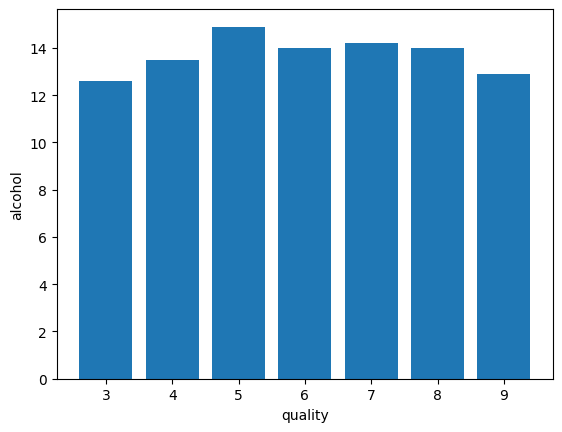

In [50]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

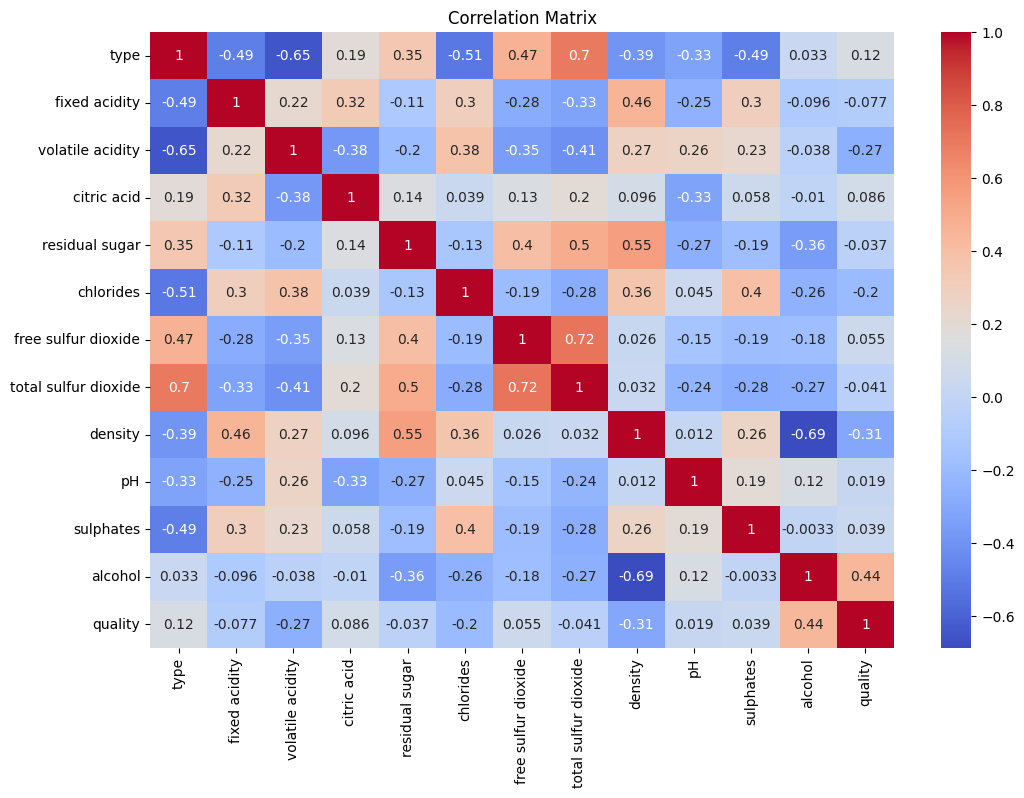

In [51]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Since total sulfur is equivalent to free sulfur we drop total sulfur since the data is still present and there is a feature less, that can introduce discrepencies

In [52]:
df = df.drop('total sulfur dioxide', axis=1)

In [53]:
features_pca = df.copy()

Setting up test data and defining target

In [54]:
features = df.drop(['quality'], axis=1)
target = df['quality']

xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)


xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

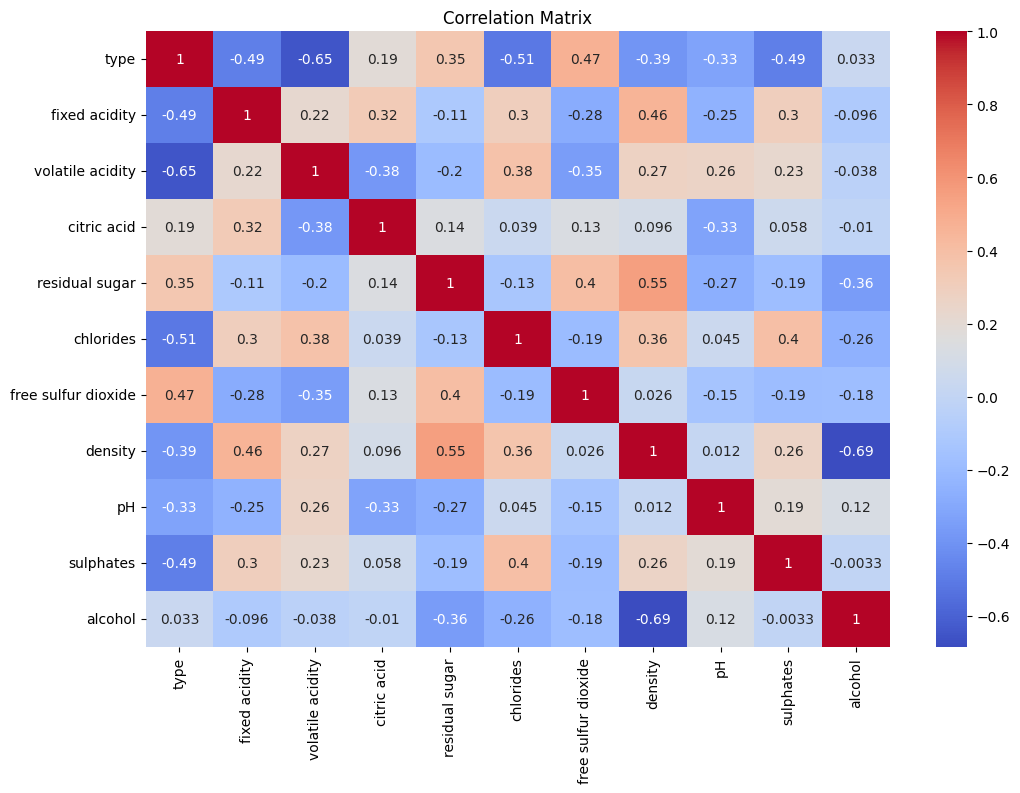

In [55]:
corr_matrix = features.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


In [56]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [57]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pickedModels = [
    LogisticRegression(max_iter=1000, solver='liblinear'),
    RidgeClassifierCV(alphas=0.1),
    KNeighborsClassifier(n_neighbors=5, metric='manhattan'),
    DecisionTreeClassifier(max_depth=6, min_samples_split=5, min_samples_leaf=2),
    RandomForestClassifier(max_depth=8, min_samples_split=5, min_samples_leaf=2)
]

def get_models() : return pickedModels

Running the models

In [58]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain)
ytest_encoded = label_encoder.transform(ytest)

models = get_models()


for model in models:
    model.fit(xtrain, ytrain_encoded)
    print(f'{model} : ')
    print('Training Accuracy : ', accuracy_score(ytrain_encoded, model.predict(xtrain)))
    print('Validation Accuracy : ', accuracy_score(ytest_encoded, model.predict(xtest)))
    print()

    print(classification_report(ytest_encoded, model.predict(xtest)))
    plt.show()


LogisticRegression(max_iter=1000, solver='liblinear') : 
Training Accuracy :  0.5366557629401578
Validation Accuracy :  0.5207692307692308

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        39
           2       0.60      0.58      0.59       429
           3       0.48      0.76      0.59       555
           4       0.60      0.03      0.05       227
           5       0.00      0.00      0.00        42
           6       0.00      0.00      0.00         2

    accuracy                           0.52      1300
   macro avg       0.24      0.20      0.18      1300
weighted avg       0.51      0.52      0.46      1300

RidgeClassifierCV(alphas=0.1) : 
Training Accuracy :  0.5366557629401578
Validation Accuracy :  0.5207692307692308

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00     

c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no

Training Accuracy :  0.7025206850105831
Validation Accuracy :  0.5507692307692308

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.28      0.13      0.18        39
           2       0.60      0.66      0.63       429
           3       0.54      0.61      0.58       555
           4       0.48      0.37      0.42       227
           5       0.44      0.10      0.16        42
           6       0.00      0.00      0.00         2

    accuracy                           0.55      1300
   macro avg       0.33      0.27      0.28      1300
weighted avg       0.54      0.55      0.54      1300



c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=5) : 
Training Accuracy :  0.5968828170098134
Validation Accuracy :  0.553076923076923

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.20      0.05      0.08        39
           2       0.64      0.55      0.59       429
           3       0.53      0.73      0.61       555
           4       0.50      0.34      0.41       227
           5       0.00      0.00      0.00        42
           6       0.00      0.00      0.00         2

    accuracy                           0.55      1300
   macro avg       0.27      0.24      0.24      1300
weighted avg       0.53      0.55      0.53      1300

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=5) : 
Training Accuracy :  0.696170867808351
Validation Accuracy :  0.5715384615384616

              precision    recall  f1-score   support

           0       0.00 

c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(ytrain_encoded)), activation='softmax'))  # Use softmax for multi-class classification
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(xtrain, ytrain_encoded, epochs=100, batch_size=32, validation_data=(xtest, ytest_encoded))


y_pred = model.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)


print('Training Accuracy : ', accuracy_score(ytrain_encoded, np.argmax(model.predict(xtrain), axis=1)))
print('Validation Accuracy : ', accuracy_score(ytest_encoded, y_pred_classes))


Epoch 1/100


c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4085 - loss: 1.4869 - val_accuracy: 0.5031 - val_loss: 1.1828
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5056 - loss: 1.1674 - val_accuracy: 0.5162 - val_loss: 1.1345
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5097 - loss: 1.1242 - val_accuracy: 0.5138 - val_loss: 1.1198
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5167 - loss: 1.1322 - val_accuracy: 0.5208 - val_loss: 1.1090
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5191 - loss: 1.1309 - val_accuracy: 0.5215 - val_loss: 1.0998
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5254 - loss: 1.1110 - val_accuracy: 0.5300 - val_loss: 1.0917
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5422 - loss: 1.1004 - val_accuracy: 0.5292 - val_loss: 1.0884
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5383 - loss: 1.1060 - val_accuracy: 0.5262

Looking into PCA

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df['quality'] = df['quality'].astype('category').cat.codes
target = df['quality']


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_pca)

# Perform PCA
pca = PCA(n_components=2)  
pca_df = pca.fit_transform(X_scaled)

This plot shows 2 clusters with all qualities in each cluster

the 2 clusters come from White and Red wine

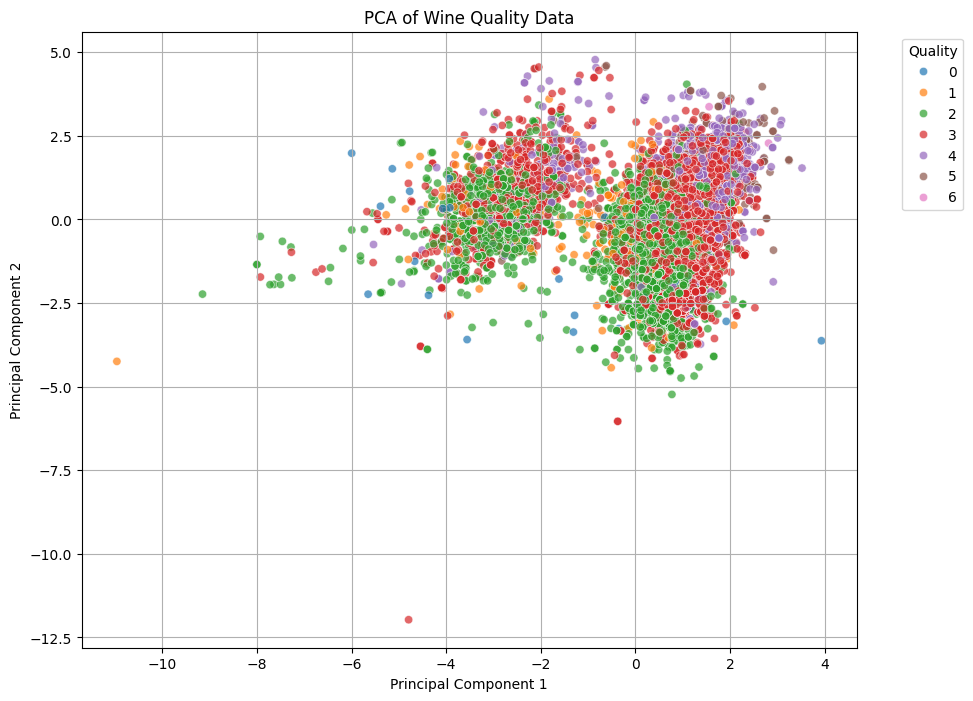

In [61]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_df, columns=['Principal Component 1', 'Principal Component 2'])

# Add PCA components to the original DataFrame
df['PCA_1'] = pca_df['Principal Component 1']
df['PCA_2'] = pca_df['Principal Component 2']

# Plot the PCA components
plt.figure(figsize=(10, 8))
sb.scatterplot(x='PCA_1', y='PCA_2', hue=target, data=df, palette='tab10', alpha=0.7)
plt.title('PCA of Wine Quality Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Finding the most importaint features using PCA


In [62]:
# Analyze feature contributions for PCA1 and PCA2
PCA1_abs = [abs(number) for number in pca.components_[0]]
PCA1 = pd.DataFrame({
    'Feature Names': features_pca.columns,
    'PCA': pca.components_[0],
    'PCA_abs': PCA1_abs,
})

sorted_df1 = PCA1.sort_values(by='PCA_abs', ascending=False)

PCA2_abs = [abs(number) for number in pca.components_[1]]
PCA2 = pd.DataFrame({
    'Feature Names': features_pca.columns,
    'PCA': pca.components_[1],
    'PCA_abs': PCA2_abs,
})

sorted_df2 = PCA2.sort_values(by='PCA_abs', ascending=False)

# Display top features
print("Top Influential Features for PCA1:")
print(sorted_df1.head())

print("\nTop Influential Features for PCA2:")
print(sorted_df2.head())

Top Influential Features for PCA1:
      Feature Names       PCA   PCA_abs
0              type  0.487324  0.487324
2  volatile acidity -0.396117  0.396117
5         chlorides -0.372321  0.372321
9         sulphates -0.315745  0.315745
1     fixed acidity -0.309608  0.309608

Top Influential Features for PCA2:
          Feature Names       PCA   PCA_abs
10              alcohol  0.479317  0.479317
4        residual sugar -0.478541  0.478541
7               density -0.469876  0.469876
8                    pH  0.281407  0.281407
6   free sulfur dioxide -0.272365  0.272365


In [63]:

important_features = ['type', 'volatile acidity', 'chlorides', 'sulphates', 'fixed acidity',
                      'alcohol', 'residual sugar', 'density', 'pH', 'free sulfur dioxide']




In [64]:
important_features_df = df[important_features]
important_features_sclaed = scaler.fit_transform(important_features_df)

In [65]:
important_features_df.head()

,type,volatile acidity,chlorides,sulphates,fixed acidity,alcohol,residual sugar,density,pH,free sulfur dioxide
0,1.0,0.27,0.045,0.45,7.0,8.8,20.7,1.0010,3.00,45.0
1,1.0,0.30,0.049,0.49,6.3,9.5,1.6,0.9940,3.30,14.0
2,1.0,0.28,0.050,0.44,8.1,10.1,6.9,0.9951,3.26,30.0
3,1.0,0.23,0.058,0.40,7.2,9.9,8.5,0.9956,3.19,47.0
4,1.0,0.23,0.058,0.40,7.2,9.9,8.5,0.9956,3.19,47.0


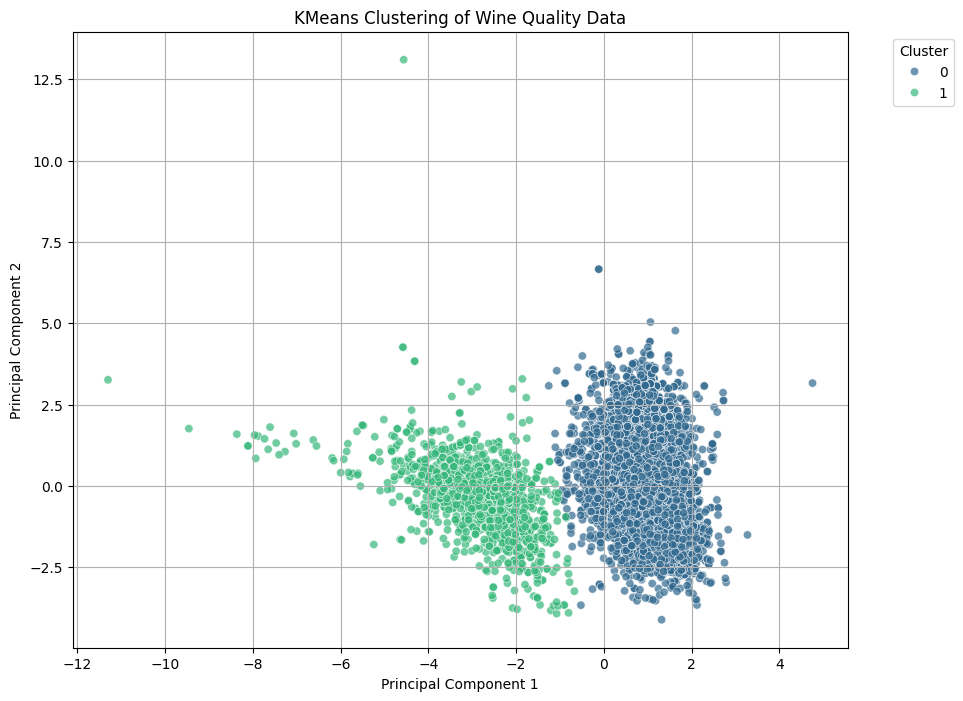

In [66]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca_features = pca.fit_transform(important_features_sclaed)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_features)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 8))
sb.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.title('KMeans Clustering of Wine Quality Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

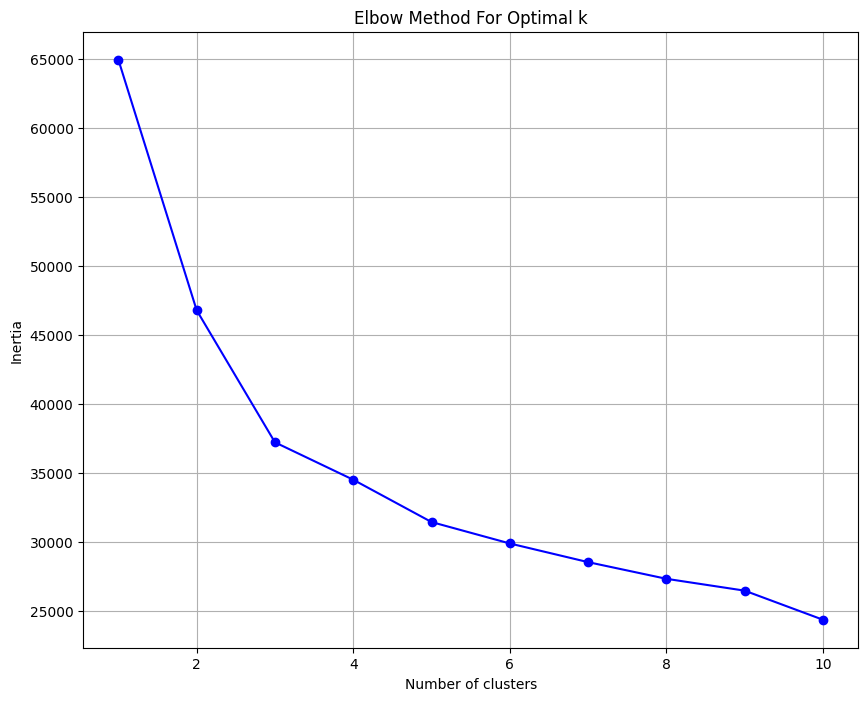

In [67]:
from sklearn.cluster import KMeans

# Elbow Analysis for KMeans Clustering
import matplotlib.pyplot as plt

# Calculate the within-cluster sum of squares (inertia) for different number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(important_features_sclaed)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 8))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

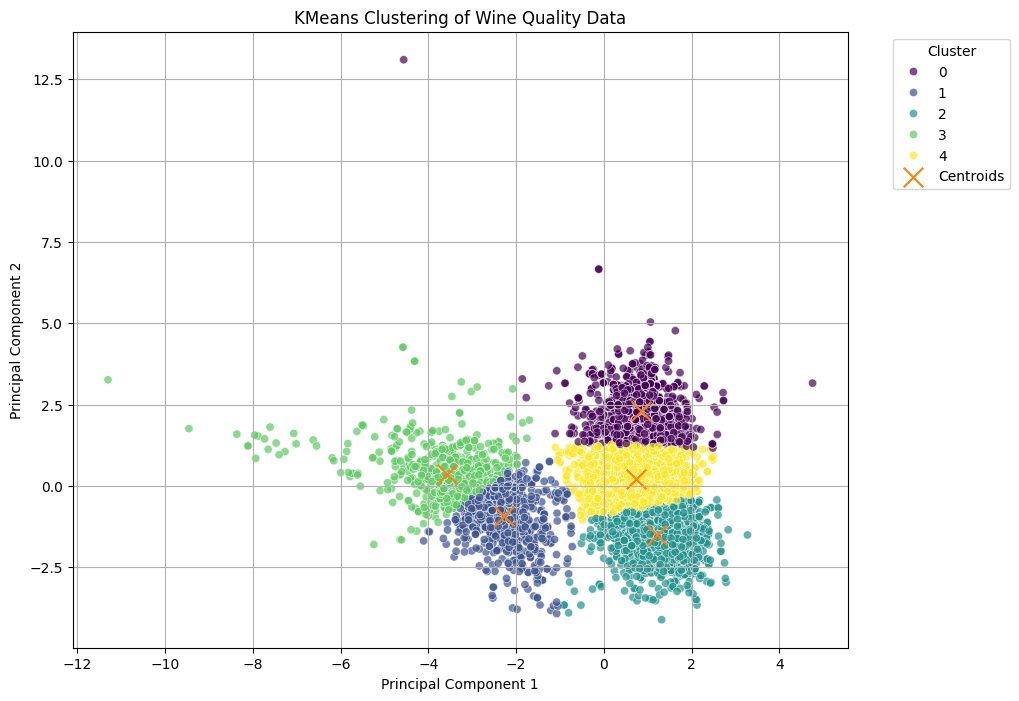

In [68]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_features)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Plot the clusters with centroids
plt.figure(figsize=(10, 8))
sb.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='x', label='Centroids')
plt.title('KMeans Clustering of Wine Quality Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [50.0, 50.0, 80.0, 80.0],
  [30.0, 30.0, 65.0, 65.0],
  [105.0, 105.0, 115.0, 115.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [192.5, 192.5, 222.5, 222.5],
  [170.0, 170.0, 207.5, 207.5],
  [133.75, 133.75, 188.75, 188.75],
  [110.0, 110.0, 161.25, 161.25],
  [47.5, 47.5, 135.625, 135.625],
  [10.0, 10.0, 91.5625, 91.5625],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [252.5, 252.5, 291.25, 291.25],
  [325.0, 325.0, 335.0, 335.0],
  [365.0, 365.0, 375

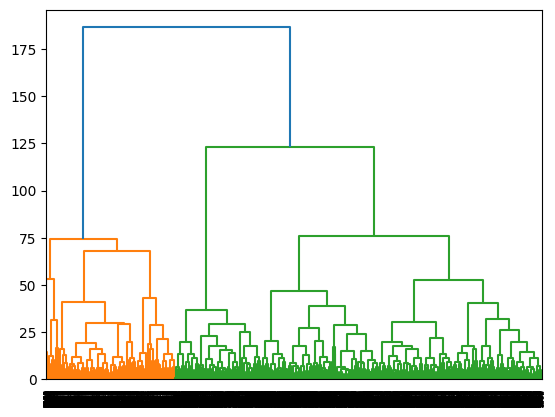

In [69]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(important_features_sclaed)
dendrogram(linkage_array)

In [70]:
# Split the PCA-transformed data into training and testing sets
xtrain_pca, xtest_pca, ytrain_pca, ytest_pca = train_test_split(
    pca_df, target, test_size=0.2, random_state=40)

# Normalize the PCA-transformed data
norm = MinMaxScaler()
xtrain_pca = norm.fit_transform(xtrain_pca)
xtest_pca = norm.transform(xtest_pca)

# Train and evaluate models using the PCA-transformed data
models = get_models()

for model in models:
    model.fit(xtrain_pca, ytrain_pca)
    print(f'{model} : ')
    print('Training Accuracy : ', accuracy_score(ytrain_pca, model.predict(xtrain_pca)))
    print('Validation Accuracy : ', accuracy_score(ytest_pca, model.predict(xtest_pca)))
    print()

    print(classification_report(ytest_pca, model.predict(xtest_pca)))
    plt.show()

LogisticRegression(max_iter=1000, solver='liblinear') : 
Training Accuracy :  0.5010583028670387
Validation Accuracy :  0.48384615384615387

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        39
           2       0.55      0.46      0.50       429
           3       0.46      0.77      0.58       555
           4       0.00      0.00      0.00       227
           5       0.00      0.00      0.00        42
           6       0.00      0.00      0.00         2

    accuracy                           0.48      1300
   macro avg       0.14      0.18      0.15      1300
weighted avg       0.38      0.48      0.41      1300

RidgeClassifierCV(alphas=0.1) : 
Training Accuracy :  0.5024052337887243
Validation Accuracy :  0.4907692307692308

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00    

c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no

Training Accuracy :  0.6786607658264383
Validation Accuracy :  0.5538461538461539

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.22      0.15      0.18        39
           2       0.58      0.64      0.61       429
           3       0.56      0.64      0.59       555
           4       0.51      0.36      0.42       227
           5       0.44      0.10      0.16        42
           6       0.00      0.00      0.00         2

    accuracy                           0.55      1300
   macro avg       0.33      0.27      0.28      1300
weighted avg       0.54      0.55      0.54      1300

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=5) : 
Training Accuracy :  0.5764864344814316
Validation Accuracy :  0.5246153846153846

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00     

c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=5) : 
Training Accuracy :  0.6521069847989225
Validation Accuracy :  0.5561538461538461

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        39
           2       0.59      0.65      0.62       429
           3       0.54      0.68      0.60       555
           4       0.55      0.27      0.36       227
           5       0.43      0.07      0.12        42
           6       0.00      0.00      0.00         2

    accuracy                           0.56      1300
   macro avg       0.30      0.24      0.24      1300
weighted avg       0.53      0.56      0.53      1300



c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jesper Kristensen\Desktop\VIA\semester 7\mal\exam project\Mal-1-gathered\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no